<a href="https://colab.research.google.com/github/deglon/AI/blob/main/Orange_Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boilerplate

In [ ]:
import pandas as pd #management ta3 les fichiers
import numpy as np #matrice et calcul (math)
import matplotlib.pyplot as plt #graphes

In [ ]:
data = pd.read_csv('https://fichier.csv')
data.head()

In [ ]:
data.describe() #min count max w std

In [ ]:
data.info() #null values (isna()), types (dtypes)

In [ ]:
data.drop([col1,col2], axis=1, inplace=True) #tfasekh il zeyid

In [ ]:
data.column.plot()

In [ ]:
plt.plot(data.column, data.label)
plt.xlabel('feature 1')
plt.ylabel('label')

In [ ]:
# preprocessing

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# models simples

#regression
from sklearn.linear_model import LinearRegression

#classification binaire
from sklearn.linear_model import LogisticRegression

# Classification multiclasses
from sklearn.svm import SVC, SVR 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
model = SVC()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
preds = model.predict(X_test)

In [ ]:
#regression
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = mean_squared_error(y_test, preds, squared=True)

#classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
from joblib import dump
dump(model, 'svm_classificer.joblib')

### Deployment

In [ ]:
from joblib import load
## code ta3 API

data = get_data()# code ta3 API
pre_processed_data = pre_process_data(data)

model = load('svm_classificer.joblib')

return model.predict(pre_processed_data)

## code ta3 API

# Dealing with Data: Missing Data

  - **Fillna**: 3abi faraghat avec soit valeur soit dictionnaire ikhalik tikhtar 3ala kol colonne chta3mel

  - **histogrammes** pour savoir les distributions: idha 3ana distribution  normale na3mlou StandardScaler, sinon MinMaxScaler.
  RobustScaler

  - **SimpleImputer**: bch 3abina il faraghat, avec params missing_values tnajem t7ot valeurs li thib 3leha w strategy bch tikhtar kifeh t3abehom

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip AirQualityUCI.zip

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('AirQualityUCI.csv', sep=';')
dataset.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [ ]:
dataset.drop(['Unnamed: 15', 'Unnamed: 16', 'Date'], axis=1, inplace=True)

In [ ]:
dataset.isna().sum()

Time             114
CO(GT)           114
PT08.S1(CO)      114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [ ]:
dataset.shape

(9471, 13)

In [ ]:
dataset.dropna(how="all", axis=0, inplace=True)

In [ ]:
dataset.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [ ]:
dataset.replace(',', '.', regex=True, inplace=True)

for column in ('CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'):
  dataset[column] = dataset[column].astype(float)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   object 
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), object(1)
memory usage: 1023.4+ KB


In [ ]:
y = dataset['AH']
X = dataset.drop('AH', axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Time'] = le.fit_transform(X['Time'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f8381fba8>,
      dtype=object)

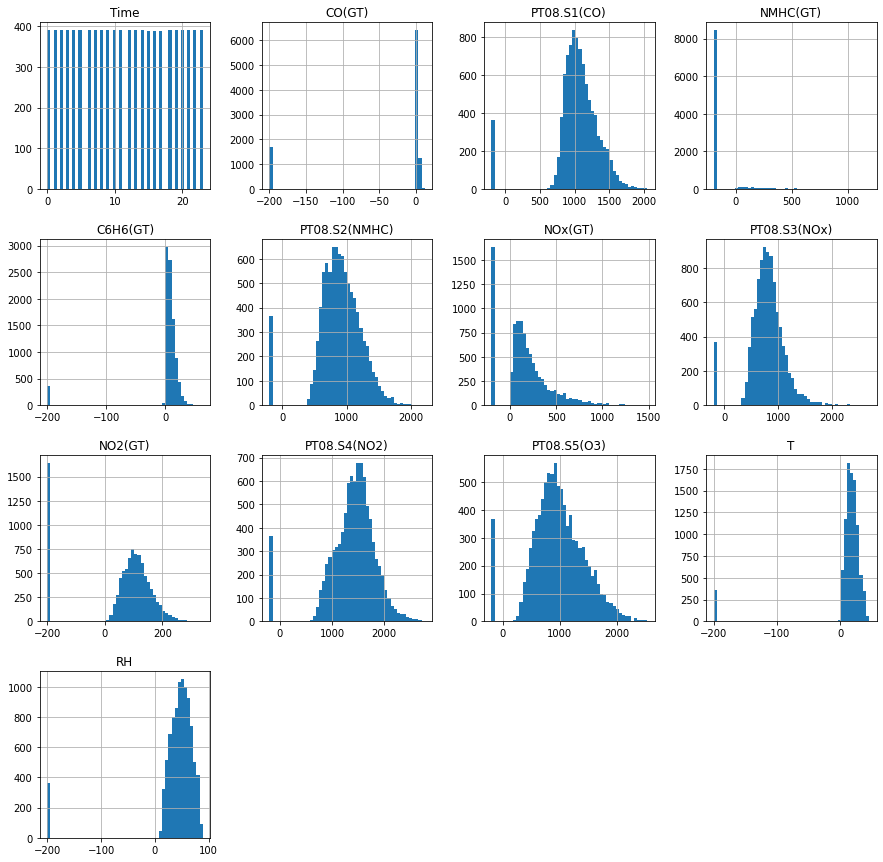

In [ ]:
X.hist(bins=50, figsize=(15,15))

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

sc = StandardScaler()
mms = MinMaxScaler()
rs = RobustScaler()

for col in ('T', 'RH'):
  X[col] = rs.fit_transform(X[[col]])

for col in ('C6H6(GT)', 'CO(GT)'):
  X[col] = rs.fit_transform(X[[col]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f82c50ac8>,
      dtype=object)

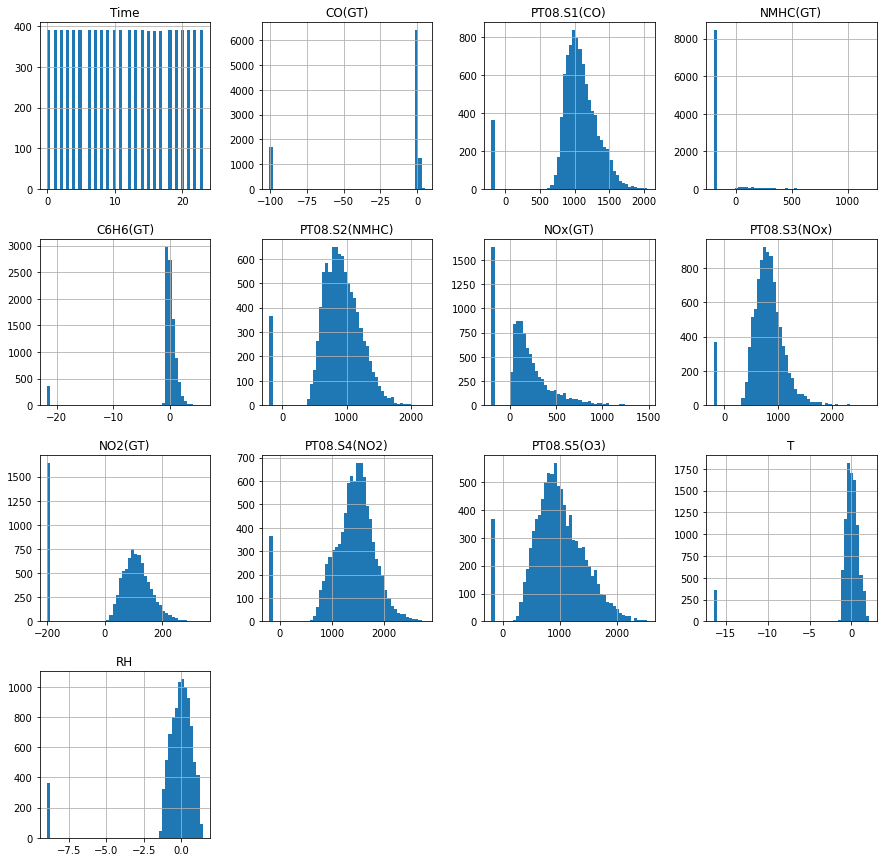

In [ ]:
X.hist(bins=50, figsize=(15,15))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
preds = lr.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

#mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
#rmse = mean_squared_error(y_test, preds, squared=True)
mse

0.9510899595875496

- mse: 0.95
- mse with delete nmhc: 0.977
- mse with mean imputation: 1.15

Mean Imputation
<img src="https://miro.medium.com/max/2816/1*MiJ_HpTbZECYjjF1qepNNQ.png">

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=-200, strategy="mean")
X['RH'] = imp.fit_transform(X[['RH']])

In [ ]:
X[ X['RH'] == -200 ].count()

Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
dtype: int64

In [ ]:
dataset.fillna(0) # NaNs kol fil dataset iwaliw 0
dataset['RH'].fillna(1) #NaNs fil colonne RH kol iwaliw 1

data.fillna({
    'RH': 1,
    'T': 0,
    'Country': 'Tunis'
})

# Categorical  Encoding

  - **LabelEncoding**: trod les categories nwamir int (not mans7 for features unless bitbi3thom ordonnées ex Time), mansou7 for y (labels)

  - **One Hot Eoncoding**: irod il dataframe kbir barcha, ama ya3ti résultat khir mil labelEncoding. Fil cas te3na khdimna bi pd.get_dummies mouch bil One Hot Encoder ta3 Sklearn (travail à la maison)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
                   names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'y'])
data.head()

,x1,x2,x3,x4,x5,x6,y
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
data.tail()

,x1,x2,x3,x4,x5,x6,y
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [ ]:
data.shape

(1728, 7)

In [ ]:
data.isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
y     0
dtype: int64

In [ ]:
X = data.drop('y', axis=1)
y = data['y']

In [ ]:
# One Hot Encoder sklarn / pandas dummies (dmmy variables)

In [ ]:
X_dummied = pd.get_dummies(X, columns= X.columns)

In [ ]:
le = LabelEncoder()

for col in X.columns:
  X[col] = le.fit_transform(X[[col]])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y = le.fit_transform(y)
le.classes_

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

In [ ]:
y.unique()

In [ ]:
label_dict = {
    'unacc': 0,
    'acc': 1,
    'good': 2,
    'vgood': 3
}

y = y.map(label_dict)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dummied, y, test_size=0.1, random_state=0)

In [ ]:
svm = SVC()
knn = KNeighborsClassifier()

for i,model in enumerate([svm, knn]):
  model.fit(X_train, y_train)
  preds = model.predict(X_test)

  acc = accuracy_score(y_test, preds)
  f1 = f1_score(y_test, preds, average="micro")
  cm = confusion_matrix(y_test, preds)

  print(f'''Model {i}: \n acc: {round(acc,2)} \n f1: {round(f1,2)} \n\n CM: \n {cm} \n\n ''')

Model 0: 
 acc: 0.92 
 f1: 0.92 

 CM: 
 [[ 38   4   0   0]
 [  0   3   0   4]
 [  5   0 115   0]
 [  0   0   0   4]] 

 
Model 1: 
 acc: 0.9 
 f1: 0.9 

 CM: 
 [[ 36   3   3   0]
 [  4   2   1   0]
 [  3   0 117   0]
 [  0   2   2   0]] 

 


# K fold Cross Validation

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv('dataset_malwares.csv')
data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_oemid,e_oeminfo,e_lfanew,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfHeaders,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,Malware,SuspiciousImportFunctions,SuspiciousNameSection,SectionsLength,SectionMinEntropy,SectionMaxEntropy,SectionMinRawsize,SectionMaxRawsize,SectionMinVirtualsize,SectionMaxVirtualsize,SectionMaxPhysical,SectionMinPhysical,SectionMaxVirtual,SectionMinVirtual,SectionMaxPointerData,SectionMinPointerData,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,248,34404,6,1236512358,0,0,240,34,523,8,0,54784,189440,0,51316,4096,4294967296,4096,512,6,0,6,0,5,2,1024,295281,274432,2,32832,524288,8192,1048576,4096,0,16,1,0,0,6,0.000000,0,512,0,274,0,188416,0,270336,0,245248,0,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,240,332,5,1365109591,0,0,224,258,267,9,0,205824,139264,0,84654,4096,4194304,4096,512,5,0,0,0,5,0,1024,0,442368,2,33088,1048576,4096,1048576,4096,0,16,1,0,0,5,3.815281,0,8704,0,24124,0,205680,0,339968,0,314880,0,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,256,332,6,1438777028,0,0,224,14,267,6,0,24576,20480,0,27364,256,4194304,4096,4096,4,0,0,0,4,0,4096,0,49152,2,0,1048576,4096,1048576,69632,0,528,1,0,0,6,0.103538,0,4096,0,329,0,24065,0,45056,0,45056,0,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,128,332,7,1354629311,0,0,224,783,267,2,22,34304,28160,297472,16685,4096,4194304,4096,512,4,0,6,0,4,0,1024,14174816,1032192,2,32768,2097152,4096,1048576,4096,0,16,1,14,0,7,0.000000,0,0,0,144,0,638976,0,1003520,0,58880,0,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,128,332,7,1386631250,0,0,224,783,267,2,56,8192,89600,512,4416,4096,4194304,4096,512,4,0,1,0,4,0,1024,0,110592,2,0,2097152,4096,1048576,4096,0,16,1,2,0,7,0.000000,0,0,0,24,0,42916,0,73728,0,54784,0,3227516992,0,2,43,0,0,61440,73728,0,90624


In [ ]:
data['Malware'].value_counts()

1    14599
0     5012
Name: Malware, dtype: int64

In [ ]:
data.drop('Name', axis=1, inplace=True)

In [ ]:
X = data.drop('Malware', axis=1)
y = data['Malware']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [ ]:
accuracy_score(y_test, preds)

0.9841957685444813

In [ ]:
confusion_matrix(y_test, preds)

array([[ 976,   28],
       [  34, 2885]])

In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')

array([0.98597833, 0.98725303, 0.98151689, 0.98406628, 0.98406628,
       0.98342894, 0.98151689, 0.98342894, 0.98788265, 0.98405612])

In [ ]:
scores.mean()

0.9843194352310715

In [ ]:
from tqdm import tqdm

In [ ]:
k_scores = []

for k in tqdm(range(1,10)):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

100%|██████████| 9/9 [01:23<00:00,  9.31s/it]


Text(0, 0.5, 'Mean Score')

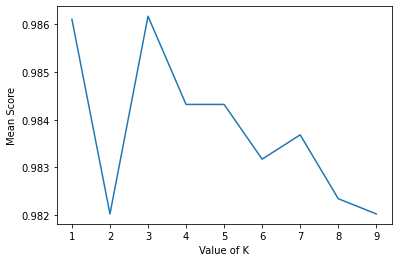

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,10), k_scores)
plt.xlabel("Value of K")
plt.ylabel('Mean Score')

In [ ]:
from sklearn.svm import SVC()

svm = SVC()

# 2- Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomSearchCV

knn = KNeighborsClassifier()

params_grid = {
    'n_neighbors': [1, 2, 5, 7, 10],
    'leaf_size': range(10,20),
    'weights': ['uniform']
}

grid = GridSearchCV(knn, params_grid, cv=10,  scoring="accuracy")
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 5, 7, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid.best_score_

0.9861040926887007

In [ ]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
grid.best_params_

{'n_neighbors': 1}

In [ ]:
from sklearn.svm import SVC

svm = SVC()

params_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.001, 0.0001, 0.1, 1],
    'C': [0.001, 0.01, 0.1, 1]
}

grid = GridSearchCV(svm, params_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

In [ ]:
grid.best_score_

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

# Misc

In [ ]:
!pip install facebook-scraper

In [ ]:
from facebook_scraper import get_posts
import json
for post in get_posts('ooredootn', pages=1, extra_info=True):
  print(post)

# Ensembling

<img src="https://quantdare.com/wp-content/uploads/2016/04/bb2-800x307.png">

<img src="https://quantdare.com/wp-content/uploads/2016/04/bb3-800x307.png">

<img src="https://quantdare.com/wp-content/uploads/2016/04/bb4-800x307.png">

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
                   names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'y'])

In [ ]:
X = data.drop('y', axis=1)
y = data['y']

In [ ]:
X_dummied = pd.get_dummies(X, columns= X.columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dummied, y, test_size=0.1, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
%time 

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.2 µs


In [ ]:
accuracy_score(y_test, preds)

0.976878612716763

### Bagging

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=1000)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


array([0.98717949, 0.98076923, 0.95512821, 0.95512821, 0.96153846,
       0.94193548, 0.98064516, 1.        , 0.98709677, 0.97419355])

In [ ]:
scores.mean()

0.9723614557485526

## Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#Xgboost 

clf = AdaBoostClassifier()
clf1 = GradientBoostingClassifier()

ada_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
gra_scores = cross_val_score(clf1, X_train, y_train, cv=10, scoring='accuracy')

In [ ]:
print(ada_scores.mean(), gra_scores.mean())

nan 0.98136476426799


In [ ]:
print(ada_scores.mean(), gra_scores.mean())

0.8341108354011582 0.98136476426799


## Voting


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

dt = DecisionTreeClassifier() #behi pour outliers
svm = SVC() #behi pour polynomial relations
knn = KNeighborsClassifier() #behi for dense data
log = LogisticRegression() # behi for 7aja

cha3b = VotingClassifier(estimators=[('dt',dt), ('svm', svm), ('knn', knn), ('log', log)])

classifiers = [dt, svm, knn, log, cha3b]
esemihom = ['dt', 'svm', 'knn', 'log', 'cha3b']

for clf, label in zip(classifiers, esemihom):
  scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
  print(f"Accuracy: {round(scores.mean(),2)} (+/- {round(scores.std(),2)}) [{label}]")

Accuracy: 0.97 (+/- 0.02) [dt]
Accuracy: 0.98 (+/- 0.01) [svm]
Accuracy: 0.9 (+/- 0.02) [knn]
Accuracy: 0.92 (+/- 0.03) [log]
Accuracy: 0.96 (+/- 0.02) [cha3b]


# Deployment

  - Postman to test APIs
  - CRON job

In [ ]:
from flask import Flask, request, jsonify
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from joblib import load, dump
import time

app = Flask(__name__)

def pre_process(data):
	# ooga boog pre process
	return pre_processed_data


@app.route('/')
def hello_world():
    return 'Hello, World!'



@app.route('/train')
def predict():
	data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
            names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'y'])

	X = data.drop('y', axis=1)
	y = data['y']

	X_dummied = pd.get_dummies(X, columns= X.columns)

	le = LabelEncoder()
	y = le.fit_transform(y)

	X_train, X_test, y_train, y_test = train_test_split(X_dummied, y, test_size=0.1, random_state=0)

	clf = DecisionTreeClassifier()
	clf.fit(X_train,y_train)
	preds = clf.predict(X_test)

	dump(clf, f'models/classifier_{time.now()}.joblib')

	with open(f'scores/scores_{time.now()}.txt', 'w') as f:
		f.write(accuracy_score(y_tes, preds))
		
	return 200



@app.route('/predict')
def predict():
	x1 = request.args.get('x1')
	x2 = request.args.get('x2')
	x3 = request.args.get('x3')
	#code to merge previous features

	data = request.data.decode('utf-8')
	processed_data = pre_process(data)
	result = model.predict(processed_data)
	
	return jsonify(result)



if __name__ == '__main__':
	#model = load('models/classifier.joblib')
    app.run(debug=True)